In [1]:
import sys
sys.path.insert(1, '/home/amrzr/Work/Codes/TreedGP_MOEA/')
from desdeo_emo.EAs.RVEA import RVEA
from desdeo_problem.Problem import DataProblem
from desdeo_problem.testproblems.TestProblems import test_problem_builder
from pyDOE import lhs
import numpy as np
from framework.treedGP_framework import run_treed_GP as treedGP
import time
import scipy.io
import matplotlib.pyplot as plt

In [2]:
nvars = 10
nobjs = 2
nsamples = 2000
x_names = [f'x{i}' for i in range(1,nvars+1)]
y_names = [f'f{i}' for i in range(1,nobjs+1)]
row_names = ['lower_bound','upper_bound']
prob = test_problem_builder('DTLZ2', nvars, nobjs)
x_data = lhs(nvars, nsamples)
y_data = prob.evaluate(x_data)[0]
x_low = np.ones(nvars)*0
x_high = np.ones(nvars)

In [3]:
problem, total_points_per_model, total_points_per_model_sequence = treedGP(x_data, y_data, x_low, x_high)

Building trees...
Building leaf node GPs...
Building finished...


In [4]:
evolver_opt = RVEA(problem, use_surrogates=True, n_iterations=5)
while evolver_opt.continue_evolution():
    evolver_opt.iterate()
    print("Population size:",np.shape(evolver_opt.population.objectives)[0])


Population size: 48
Population size: 49
Population size: 50
Population size: 50
Population size: 49


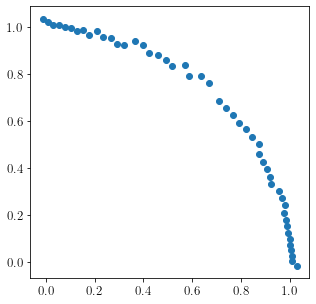

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(evolver_opt.population.objectives[:,0], evolver_opt.population.objectives[:,1])
plt.show()